In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import ensemble, model_selection

from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import  XGBClassifier

import pickle

In [8]:
churn = pd.read_csv('C:\\Users\\lopez\\OneDrive\\Escritorio\\BOOTCAMP_DS\\ALUMNO\\3-Machine_Learning\\Entregas\\entrega ML\\churn\\ENTREGABLE\\Data\\Data_procesed\\train.procesed.csv')

In [9]:
#Dividimos el dataset de train
X = churn.drop(['Exited'],1)
y = churn['Exited']


#Hacemos Smooting para balancear los datos
smoting = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors= 10)
X, y = smoting.fit_resample(X, y)

C:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [10]:
#Prodesamos las X del modelo de entrenamiento
X_train_scaled = StandardScaler().fit_transform(X.values)


In [11]:
#Importamos dataset test
test = pd.read_csv('C:\\Users\\lopez\\OneDrive\\Escritorio\\BOOTCAMP_DS\\ALUMNO\\3-Machine_Learning\\Entregas\\entrega ML\\churn\\ENTREGABLE\\Data/Data_procesed/test.procesed.csv')

#Dividimos el dataset de test
X_test = test.drop(['Exited'],1)
y_test = test['Exited']

#Escalamos los datos también en test
X_test_scaled = StandardScaler().fit_transform(X_test.values)

C:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


#### MEJORES MODELOS EN FUNCION DE LOS OBJETIVOS

In [12]:
#SVC lógico sin errar muchos ceros.

svc1 = SVC(kernel='poly', degree =3)

svc1.fit(X_train_scaled,y)

SVC(kernel='poly')

Recall score :  0.7828282828282829
Precision score :  0.636


<AxesSubplot:>

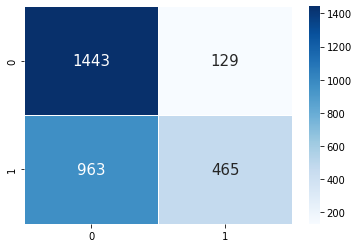

In [13]:
svc1_pred = svc1.predict(X_test_scaled)
print('Recall score : ' , recall_score(y_test,svc1_pred))
print('Precision score : ' , accuracy_score(y_test,svc1_pred))
sns.heatmap(confusion_matrix(svc1_pred,y_test), annot = True, linewidths=.5, fmt='g', annot_kws = {'size':15},cmap='Blues')

In [14]:
#SVC que maximiza la detencion de unos.

svc2 = SVC(kernel='poly', degree =19)

svc2.fit(X_train_scaled,y)

SVC(degree=19, kernel='poly')

Recall score :  0.9511784511784511
Precision score :  0.28633333333333333


<AxesSubplot:>

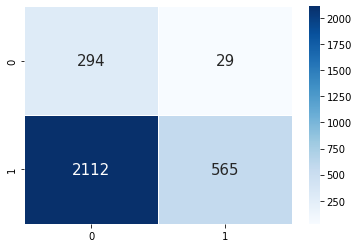

In [15]:
svc2_pred = svc2.predict(X_test_scaled)
print('Recall score : ' , recall_score(y_test,svc2_pred))
print('Precision score : ' , accuracy_score(y_test,svc2_pred))
sns.heatmap(confusion_matrix(svc2_pred,y_test), annot = True, linewidths=.5, fmt='g', annot_kws = {'size':15},cmap='Blues')

In [16]:
#En caso de que el banco le sirva con detectar el 70% de unos y minimice los falsos negativos.

gbc = GradientBoostingClassifier(n_estimators = 100, random_state=42)

gbc.fit(X_train_scaled, y)


GradientBoostingClassifier(random_state=42)

Recall score :  0.6632996632996633
Precision score :  0.741


<AxesSubplot:>

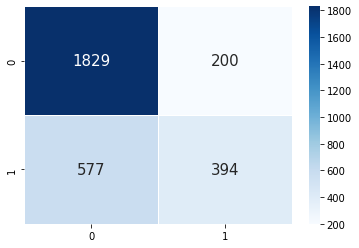

In [17]:
gbc_pred = gbc.predict(X_test_scaled)
print('Recall score : ' , recall_score(y_test,gbc_pred))
print('Precision score : ' , accuracy_score(y_test,gbc_pred))
sns.heatmap(confusion_matrix(gbc_pred,y_test), annot = True, linewidths=.5, fmt='g', annot_kws = {'size':15},cmap='Blues')

#### GUARDADO DE LOS MODELOS

In [18]:
with open('svc2', 'wb') as archivo_salida:
    pickle.dump(svc2, archivo_salida)